In [8]:
import torch 
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, random_split
import os
import tqdm
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
basedir = os.getcwd()
dataset = "/fruits-360_dataset_100x100"
train_path = basedir + dataset + "/fruits-360/Training"
test_path = basedir + dataset + "/fruits-360/Test"
fruits = os.listdir(train_path)
fruits

['Onion Red 1',
 'Huckleberry 1',
 'Pomelo Sweetie 1',
 'Potato White 1',
 'Cucumber 3',
 'Papaya 1',
 'Cucumber Ripe 2',
 'Pear 3',
 'Eggplant long 1',
 'Grapefruit Pink 1',
 'Pomegranate 1',
 'Zucchini 1',
 'Apple Golden 2',
 'Tomato Heart 1',
 'Mulberry 1',
 'Hazelnut 1',
 'Pear Kaiser 1',
 'Zucchini dark 1',
 'Cactus fruit 1',
 'Nut Forest 1',
 'Apple Red Yellow 2',
 'Kaki 1',
 'Cherry Rainier 1',
 'Apple Braeburn 1',
 'Banana 1',
 'Apple 6',
 'Onion White 1',
 'Apple Red Delicious 1',
 'Cauliflower 1',
 'Carambula 1',
 'Cabbage white 1',
 'Kiwi 1',
 'Apple Golden 1',
 'Avocado ripe 1',
 'Grape White 2',
 'Peach Flat 1',
 'Orange 1',
 'Tamarillo 1',
 'Pepper Yellow 1',
 'Pear Williams 1',
 'Mango 1',
 'Lemon 1',
 'Tomato not Ripened 1',
 'Redcurrant 1',
 'Pear 2',
 'Plum 3',
 'Potato Sweet 1',
 'Banana Red 1',
 'Grape White 3',
 'Pepper Red 1',
 'Dates 1',
 'Beetroot 1',
 'Banana Lady Finger 1',
 'Pear Stone 1',
 'Lemon Meyer 1',
 'Grape Blue 1',
 'Tomato Yellow 1',
 'Cherry 2',
 '

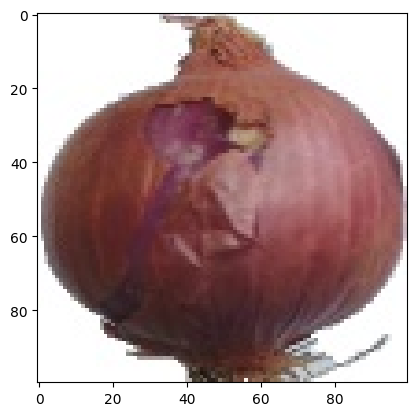

In [3]:
im = Image.open(os.path.join(train_path,fruits[0],os.listdir(train_path + '/' + fruits[0])[0]))
plt.imshow(im)

In [10]:
#using dataloader 
trainfolder = datasets.ImageFolder(train_path, transform=transforms.ToTensor());
testfolder = datasets.ImageFolder(test_path, transform=transforms.ToTensor());
train_size = len(trainfolder)
print(train_size)
test_size = len(testfolder)
val_size = 10000
train_size -= val_size
trainds,valds = random_split(trainfolder, [train_size, val_size])
len(trainds), len(valds)

70491


(60491, 10000)

In [11]:
traindataloader = torch.utils.data.DataLoader(trainfolder, batch_size=128, shuffle=True)
testdataloader = torch.utils.data.DataLoader(testfolder, batch_size=128, shuffle=True)

In [23]:
dataiter = iter(traindataloader)
images, labels = next(dataiter)
images.shape, labels.shape

(torch.Size([128, 3, 100, 100]), torch.Size([128]))

In [5]:
class ConvNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3,6,5)
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(6,16,5)
        self.fc1 = nn.Linear(16 * 5 * 5, 300) 
        self.fc2 = nn.Linear(300, 141)
    def forward(self,x):
        c1 = F.relu(self.conv1(x)) 
        l2 = F.max_pool2d(c1, (2,2))
        c2 = F.relu(self.conv2(l2)) 
        l4 = F.max_pool2d(c2,(2,2))
        l4 = torch.flatten(l4,1) 
        l5 = F.relu(self.fc1(l4))
        out = F.relu(self.fc2(l5))
        return out
model = ConvNet()

In [3]:
#add all data in filename
# def load_data(path):
#     folders = [f for f in os.listdir(path)]
#     images = []
#     imglabels = []
#     labels = [] 
#     yes = True
#     for f in folders:
#         labels.append(f)
#         folder_path = os.path.join(path, f)
#         cur_images = [(folder_path + "/" + img) for img in os.listdir(folder_path)]
#         imglabels.extend(len(cur_images) * [f])
#         images.extend(cur_images)
#     return np.array(images), np.array(imglabels), labels

# X_train, Y_train, labels = load_data(train_path)
# X_test, Y_test, _ = load_data(test_path)
# len(Y_train)

70491

In [4]:
#process Y's into number and prob distribution for loss function
# Y_train_temp = np.zeros((len(Y_train),len(labels)))
# Y_test_temp = np.zeros((len(Y_test),len(labels)))
# for cnt, label in enumerate(labels):
#     for i in range(len(Y_train)):
#         if Y_train[i] == label:
#             Y_train_temp[i][cnt] = 1 
#     for i in range(len(Y_test)):
#         if Y_test[i] == label:
#             Y_test_temp[i][cnt] = 1
# Y_train = Y_train_temp
# Y_test = Y_test_temp
# print(Y_train[0])

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [5]:
#shuffle
# trainp = np.random.permutation(len(X_train))
# X_train = X_train[trainp]
# Y_train = Y_train[trainp]
# testp = np.random.permutation(len(X_test))
# X_test = X_test[testp]
# Y_test = Y_test[testp]
# Y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.])

In [3]:
# transform = transforms.Compose([
#     transforms.Resize((128,128)),
#     transforms.ToTensor(),
# ])

In [ ]:
#preparing dataset attempt #2
# def prepare_dataset(base_dir, transform=None):
#     dataset = []
#     labels = sorted(os.listdir(base_dir))
#     for cnt, label_name in enumerate(labels):
#         folder_path = os.path.join(base_dir, label_name)
#         if os.path.isdir(folder_path):
#             for img in os.listdir(folder_path):
#                 img_path = os.path.join(folder_path, img)

#                 with Image.open(img_path) as curimg:
#                     curimg = curimg.convert("RGB")
#                     if transform:
#                         curimg = transform(curimg)
#                 dataset.append((curimg, label_name))
# train_data = prepare_dataset(train_path, transform=transform)